 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
csv_path = Path("./Resources/whale_returns.csv")
df = pd.read_csv(csv_path)

In [3]:
# Count nulls
df.count()

Date                           1060
SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [4]:
# Drop nulls
df.dropna()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [5]:
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis=1)

In [6]:
df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
csv_path2 = Path("./Resources/algo_returns.csv")
df2 = pd.read_csv(csv_path2)

In [8]:
# Count nulls
df2.count()

Date      1241
Algo 1    1241
Algo 2    1235
dtype: int64

In [9]:
# Drop nulls
df2.dropna()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [10]:
df2.index = pd.to_datetime(df2['Date'])
df2 = df2.drop(['Date'], axis=1)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices
csv_path3 = Path("./Resources/sp500_history.csv")
df3 = pd.read_csv(csv_path3)
df3

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
...,...,...
1644,5-Oct-12,$1460.93
1645,4-Oct-12,$1461.40
1646,3-Oct-12,$1450.99
1647,2-Oct-12,$1445.75


In [12]:
# Check Data Types
print(df3.dtypes['Date'])
print(df3.dtypes['Close'])

object
object


In [13]:
# Fix Data Types
df3.index = pd.to_datetime(df3['Date'])
df3['Close'] = df3['Close'].str.replace(',', '').str.replace('$', '').astype(float)

In [14]:
df3 = df3.drop(['Date'], axis=1)

In [15]:
print(df3.dtypes['Close'])

float64


In [16]:
# Calculate Daily Returns
df3['SPY_Returns'] = df3.pct_change()
df3

,Close,SPY_Returns
Date,,
2019-04-23,2933.68,NaN
2019-04-22,2907.97,-0.008764
2019-04-18,2905.03,-0.001011
2019-04-17,2900.45,-0.001577
2019-04-16,2907.06,0.002279
...,...,...
2012-10-05,1460.93,0.003469
2012-10-04,1461.40,0.000322
2012-10-03,1450.99,-0.007123


In [17]:
# Drop nulls
df3.dropna()

,Close,SPY_Returns
Date,,
2019-04-22,2907.97,-0.008764
2019-04-18,2905.03,-0.001011
2019-04-17,2900.45,-0.001577
2019-04-16,2907.06,0.002279
2019-04-15,2905.58,-0.000509
...,...,...
2012-10-05,1460.93,0.003469
2012-10-04,1461.40,0.000322
2012-10-03,1450.99,-0.007123


In [18]:
# Rename `Close` Column to be specific to this portfolio.
df3.rename(columns={'Close': 'SPY_Close'}, inplace=True)
df3

,SPY_Close,SPY_Returns
Date,,
2019-04-23,2933.68,NaN
2019-04-22,2907.97,-0.008764
2019-04-18,2905.03,-0.001011
2019-04-17,2900.45,-0.001577
2019-04-16,2907.06,0.002279
...,...,...
2012-10-05,1460.93,0.003469
2012-10-04,1461.40,0.000322
2012-10-03,1450.99,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([df, df2, df3], axis="columns", join="inner")
combined_df = combined_df.drop(['SPY_Close'], axis=1)
combined_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPY_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

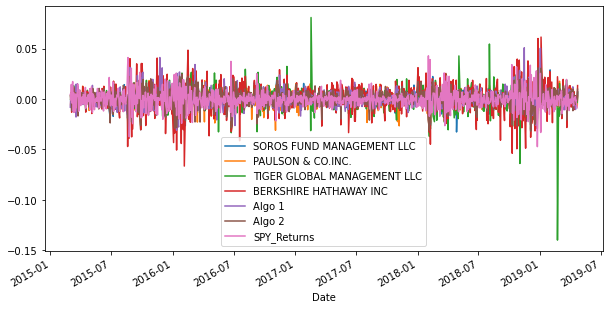

In [20]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

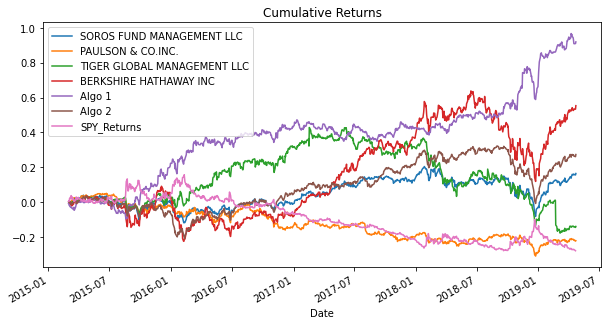

In [21]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

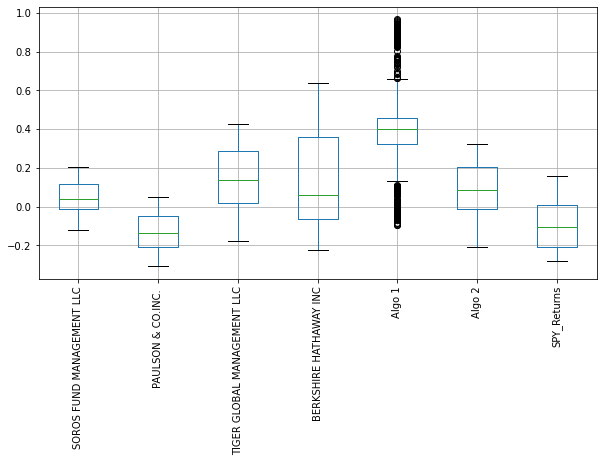

In [22]:
# Box plot to visually show risk
cumulative_returns.boxplot(rot=90,figsize=(10,5))

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
all_portfolio_std = cumulative_returns.std()


In [24]:
# Calculate  the daily standard deviation of S&P 500
print(f"the daily standard deviation of S&P500 is {all_portfolio_std['SPY_Returns']}")
# Determine which portfolios are riskier than the S&P 500
aps_df = pd.DataFrame (all_portfolio_std, columns = ['STDV'])
aps_df = aps_df.rename_axis('Portfolio').sort_values(by = ['STDV', 'Portfolio'], ascending = [False, True])
#I want to tell python to slice this df from the top of the index list to SPY_Returns (which is the 5th index). I can't quite get the syntax to work so I just used 0,1,2,3 for now.
Highest_Risk = aps_df.iloc[[0,1,2,3],[0]]
print('These portfolios have a higher standard deviation and are more risky than the S&P500:')
Highest_Risk

the daily standard deviation of S&P500 is 0.11535574982837364
These portfolios have a higher standard deviation and are more risky than the S&P500:


,STDV
Portfolio,
BERKSHIRE HATHAWAY INC,0.241575
Algo 1,0.230581
TIGER GLOBAL MANAGEMENT LLC,0.149844
Algo 2,0.132086


### Calculate the Annualized Standard Deviation

In [25]:
# Calculate the annualized standard deviation (252 trading days)
combined_std_annual = combined_df.std() * np.sqrt(252)
combined_std_annual


SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120987
Algo 2                         0.132374
SPY_Returns                    0.136268
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

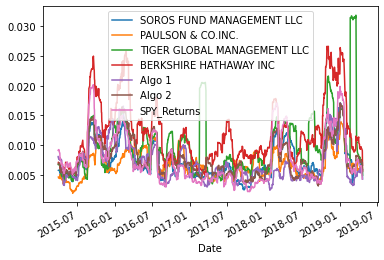

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

<AxesSubplot:>

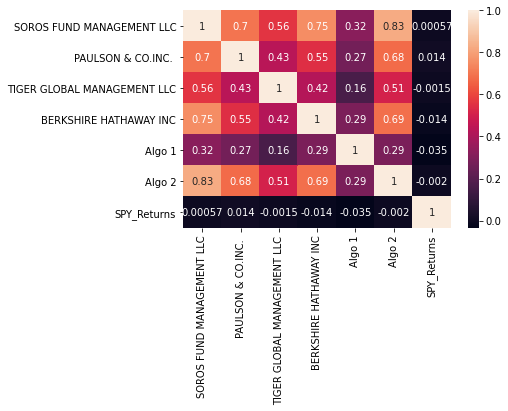

In [27]:
# Calculate the correlation
price_correlation = combined_df.corr()
# Display de correlation matrix
sns.heatmap(price_correlation, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

covariance of Algo 1 is -7.049109175177787e-05
variance of SPY is 0.013306949018466324
Algo 1 beta is -0.005297314332079874


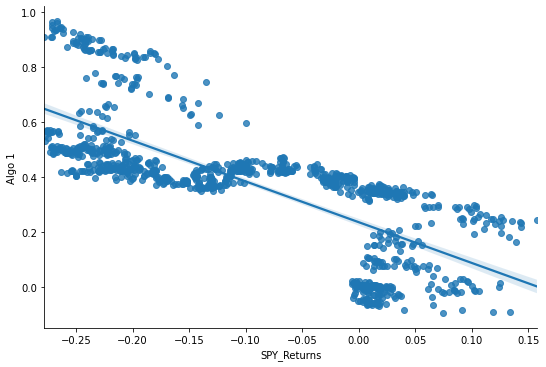

In [28]:
# Calculate covariance of a single portfolio
covariance = cumulative_returns['Algo 1'].cov(df3['SPY_Returns'])
print(f'covariance of Algo 1 is {covariance}')
# Calculate variance of S&P 500
variance = cumulative_returns['SPY_Returns'].var()
print(f'variance of SPY is {variance}')
# Computing beta
algo1_beta = covariance / variance
print(f'Algo 1 beta is {algo1_beta}')
# Plot beta trend
sns.lmplot(x='SPY_Returns', y='Algo 1', data=cumulative_returns, aspect=1.5, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [29]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPY_Returns
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN,0.004395,0.002934,0.000107
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.003724,0.002197,0.003305
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004036,0.002271,0.006590
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003466,0.006589,0.007159
...,...,...,...,...,...,...,...
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007721
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007595
2019-04-18,0.007424,0.006737,0.015787,0.011554,0.006984,0.007779,0.007471


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [30]:
# Annualized Sharpe Ratios
combined_df_sharpe_ratios = (combined_df.mean() * 252) / (combined_std_annual)
print(f'sharpe rations are {combined_df_sharpe_ratios}')

sharpe rations are SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.360829
Algo 2                         0.506929
SPY_Returns                   -0.510171
dtype: float64


<AxesSubplot:>

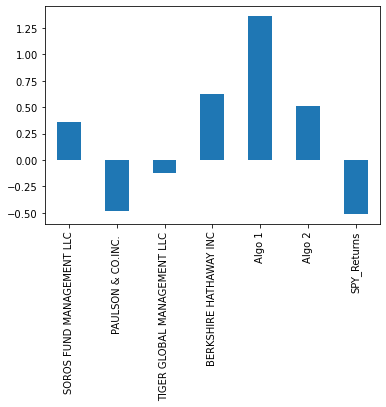

In [31]:
# Visualize the sharpe ratios as a bar plot
combined_df_sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [32]:
#Both Algo 1 and Algo 2 have positive sharpe ratios with Algo 1 being the highest sharpe ratio of all portfolios. Algo 2 also has a positive sharpe ratio but it is actually behind Berkshire Hathaway. Overall, the algorithimic stratergies are doing well and placing in 1st and 3rd place based on sharpe ratios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [33]:
# Reading data from 1st stock
my_csv_path1 = Path("./Resources/TMHC.csv")
my_df1 = pd.read_csv(my_csv_path1)
my_df1 = my_df1.drop(['Unnamed: 0'], axis=1)
my_df1 = my_df1.drop([0,1], axis=0)
my_df1.rename(columns={'Unnamed: 1': 'Date', 'Unnamed: 2': 'TMHC'}, inplace=True)
my_df1.index = pd.to_datetime(my_df1['Date'])
my_df1.index = my_df1.index.date
my_df1 = my_df1.drop(['Date'], axis=1)
my_df1['TMHC'] = my_df1['TMHC'].str.replace(',', '').str.replace('$', '').astype(float)
my_df1['TMHC_Returns'] = my_df1.pct_change()
my_df1.head()

,TMHC,TMHC_Returns
2015-02-03,19.39,NaN
2015-03-03,18.69,-0.036101
2015-04-03,19.22,0.028357
2015-05-03,19.27,0.002601
2015-06-03,18.90,-0.019201


In [34]:
# Reading data from 2nd stock
my_csv_path2 = Path("./Resources/TSCO.csv")
my_df2 = pd.read_csv(my_csv_path2)
my_df2 = my_df2.drop(['Unnamed: 0'], axis=1)
my_df2 = my_df2.drop([0,1], axis=0)
my_df2.rename(columns={'Unnamed: 1': 'Date', 'Unnamed: 2': 'TSCO'}, inplace=True)
my_df2.index = pd.to_datetime(my_df2['Date'])
my_df2.index = my_df2.index.date
my_df2 = my_df2.drop(['Date'], axis=1)
my_df2['TSCO'] = my_df2['TSCO'].str.replace(',', '').str.replace('$', '').astype(float)
my_df2['TSCO_Returns'] = my_df2.pct_change()
my_df2.head()

,TSCO,TSCO_Returns
2015-02-03,89.31,NaN
2015-03-03,86.58,-0.030568
2015-04-03,85.13,-0.016748
2015-05-03,85.35,0.002584
2015-06-03,84.68,-0.007850


In [35]:
# Reading data from 3rd stock
my_csv_path3 = Path("./Resources/UGL.csv")
my_df3 = pd.read_csv(my_csv_path3)
my_df3 = my_df3.drop(['Unnamed: 0'], axis=1)
my_df3 = my_df3.drop([0,1], axis=0)
my_df3.rename(columns={'Unnamed: 1': 'Date', 'Unnamed: 2': 'UGL'}, inplace=True)
my_df3.index = pd.to_datetime(my_df3['Date'])
my_df3.index = my_df3.index.date
my_df3 = my_df3.drop(['Date'], axis=1)
my_df3['UGL'] = my_df3['UGL'].str.replace(',', '').str.replace('$', '').astype(float)
my_df3['UGL_Returns'] = my_df3.pct_change()
my_df3.head()

,UGL,UGL_Returns
2015-02-03,39.65,NaN
2015-03-03,39.48,-0.004288
2015-04-03,39.31,-0.004306
2015-05-03,39.22,-0.002289
2015-06-03,37.12,-0.053544


In [36]:
# Reading data from 4th stock
my_csv_path4 = Path("./Resources/WBIF.csv")
my_df4 = pd.read_csv(my_csv_path4)
my_df4 = my_df4.drop(['Unnamed: 0'], axis=1)
my_df4 = my_df4.drop([0,1], axis=0)
my_df4.rename(columns={'Unnamed: 1': 'Date', 'Unnamed: 2': 'WBIF'}, inplace=True)
my_df4.index = pd.to_datetime(my_df4['Date'])
my_df4.index = my_df4.index.date
my_df4 = my_df4.drop(['Date'], axis=1)
my_df4['WBIF'] = my_df4['WBIF'].str.replace(',', '').str.replace('$', '').astype(float)
my_df4['WBIF_Returns'] = my_df4.pct_change()
my_df4.head()

,WBIF,WBIF_Returns
2015-02-03,25.13,NaN
2015-03-03,25.06,-0.002786
2015-04-03,25.00,-0.002394
2015-05-03,24.98,-0.000800
2015-06-03,24.61,-0.014812


In [37]:
# Reading data from 5th stock
my_csv_path5 = Path("./Resources/XEC.csv")
my_df5 = pd.read_csv(my_csv_path5)
my_df5 = my_df5.drop(['Unnamed: 0'], axis=1)
my_df5 = my_df5.drop([0,1], axis=0)
my_df5.rename(columns={'Unnamed: 1': 'Date', 'Unnamed: 2': 'XEC'}, inplace=True)
my_df5.index = pd.to_datetime(my_df5['Date'])
my_df5.index = my_df5.index.date
my_df5 = my_df5.drop(['Date'], axis=1)
my_df5['XEC'] = my_df5['XEC'].str.replace(',', '').str.replace('$', '').astype(float)
my_df5['XEC_Returns'] = my_df5.pct_change()
my_df5.head()

,XEC,XEC_Returns
2015-02-03,109.85,NaN
2015-03-03,110.69,0.007647
2015-04-03,110.05,-0.005782
2015-05-03,111.10,0.009541
2015-06-03,109.44,-0.014941


In [38]:
# Combine all stocks in a single DataFrame
my_combined_df = pd.concat([my_df1, my_df2, my_df3, my_df4, my_df5], axis="columns", join="inner")
my_combined_df.head()

,TMHC,TMHC_Returns,TSCO,TSCO_Returns,UGL,UGL_Returns,WBIF,WBIF_Returns,XEC,XEC_Returns
2015-02-03,19.39,NaN,89.31,NaN,39.65,NaN,25.13,NaN,109.85,NaN
2015-03-03,18.69,-0.036101,86.58,-0.030568,39.48,-0.004288,25.06,-0.002786,110.69,0.007647
2015-04-03,19.22,0.028357,85.13,-0.016748,39.31,-0.004306,25.00,-0.002394,110.05,-0.005782
2015-05-03,19.27,0.002601,85.35,0.002584,39.22,-0.002289,24.98,-0.000800,111.10,0.009541
2015-06-03,18.90,-0.019201,84.68,-0.007850,37.12,-0.053544,24.61,-0.014812,109.44,-0.014941


In [39]:
# Reset Date index
# already done

In [40]:
# Reorganize portfolio data by having a column per symbol
# already done

In [41]:
# Calculate daily returns
# already done
# Drop NAs
my_combined_df = my_combined_df.drop(['TMHC', 'TSCO', 'UGL', 'WBIF', 'XEC'], axis=1)
my_combined_df.dropna()
# Display sample data
my_combined_df.head()

,TMHC_Returns,TSCO_Returns,UGL_Returns,WBIF_Returns,XEC_Returns
2015-02-03,NaN,NaN,NaN,NaN,NaN
2015-03-03,-0.036101,-0.030568,-0.004288,-0.002786,0.007647
2015-04-03,0.028357,-0.016748,-0.004306,-0.002394,-0.005782
2015-05-03,0.002601,0.002584,-0.002289,-0.000800,0.009541
2015-06-03,-0.019201,-0.007850,-0.053544,-0.014812,-0.014941


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Set weights
weights = [0.2, 0.2, 0.2, 0.2, 0.2]

# Calculate portfolio return
my_portfolio_returns = my_combined_df.dot(weights)

# Display sample data
my_portfolio_returns.head()

2015-02-03         NaN
2015-03-03   -0.013219
2015-04-03   -0.000174
2015-05-03    0.002327
2015-06-03   -0.022070
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [60]:
# Join your returns DataFrame to the original returns DataFrame
super_df = pd.concat([combined_df, my_portfolio_returns], axis="columns", join="inner")

In [62]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
super_df.dropna()
super_df.rename(columns={0: 'Jay_Portfolio'}, inplace=True)
super_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPY_Returns,Jay_Portfolio
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.013219
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,0.002276
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,-0.000754
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.012445,0.003634
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.006112,-0.006785


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [64]:
# Calculate the annualized `std`
super_combined_std_annual = super_df.std() * np.sqrt(252)
super_combined_std_annual

SOROS FUND MANAGEMENT LLC      0.127853
PAULSON & CO.INC.              0.111669
TIGER GLOBAL MANAGEMENT LLC    0.176700
BERKSHIRE HATHAWAY INC         0.208716
Algo 1                         0.120997
Algo 2                         0.133619
SPY_Returns                    0.140049
Jay_Portfolio                  0.148500
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

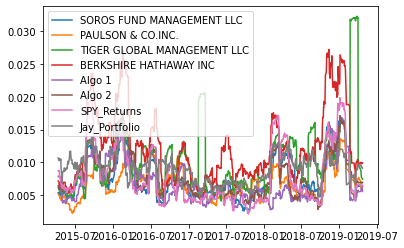

In [65]:
# Calculate rolling standard deviation
super_df.rolling(window=21).std()
# Plot the rolling standard deviation
super_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

<AxesSubplot:>

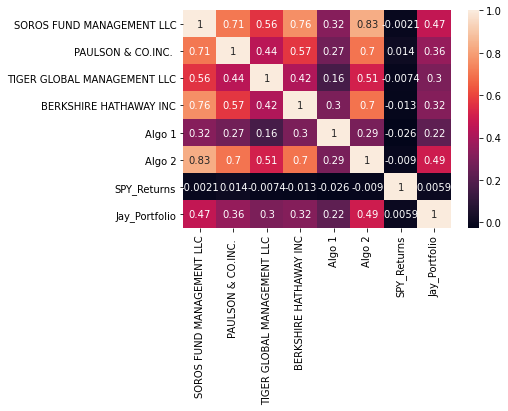

In [66]:
price_correlation = super_df.corr()
sns.heatmap(price_correlation, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

covariance of Jay_Portfolio is -7.049109175177787e-05
variance of SPY is 7.78324419455312e-05
my beta is -0.9056775040041662


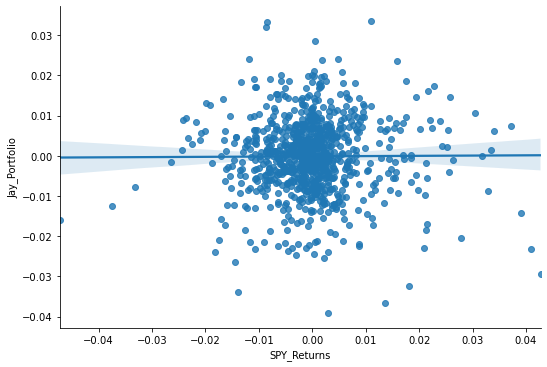

In [68]:
# Calculate covariance of a single portfolio
my_covariance = super_df['Jay_Portfolio'].cov(df3['SPY_Returns'])
print(f'covariance of Jay_Portfolio is {covariance}')
# Calculate variance of S&P 500
variance = super_df['SPY_Returns'].var()
print(f'variance of SPY is {variance}')
# Computing beta
my_beta = covariance / variance
print(f'my beta is {my_beta}')
# Plot beta trend
sns.lmplot(x='SPY_Returns', y='Jay_Portfolio', data=super_df, aspect=1.5, fit_reg=True)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [69]:
# Calculate Annualzied Sharpe Ratios
super_combined_df_sharpe_ratios = (super_df.mean() * 252) / (super_combined_std_annual)
print(f'sharpe rations are {super_combined_df_sharpe_ratios}')

sharpe rations are SOROS FUND MANAGEMENT LLC     -0.014609
PAULSON & CO.INC.             -0.726921
TIGER GLOBAL MANAGEMENT LLC   -0.014604
BERKSHIRE HATHAWAY INC         0.184217
Algo 1                         1.175336
Algo 2                         0.215680
SPY_Returns                   -0.422063
Jay_Portfolio                 -0.205872
dtype: float64


<AxesSubplot:>

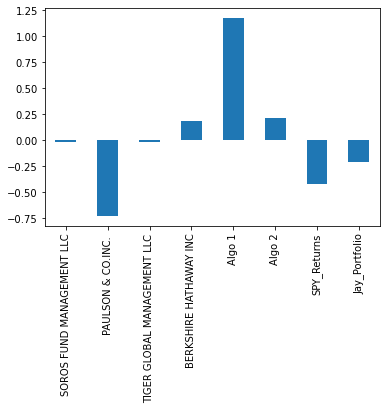

In [70]:
# Visualize the sharpe ratios as a bar plot
super_combined_df_sharpe_ratios.plot.bar()

### How does your portfolio do?

Write your answer here!

In [ ]:
#My portfolio of 5 random stocks did not do so well. It performed better than the S&P500 and Paulson & Co. but it did worse than the others and also has a negative sharpe ratio.